In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
loan = pd.read_csv('Loan_Modelling.csv').drop(columns=['ID', 'ZIPCode'])
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


To predict whether a liability customer will buy a personal loan or not.



## EDA

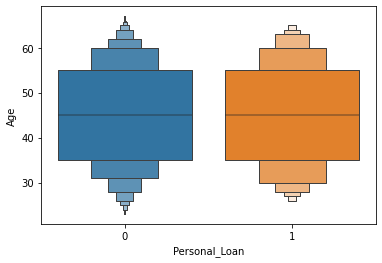

In [11]:
sns.boxenplot(x='Personal_Loan', y='Age', data=loan);

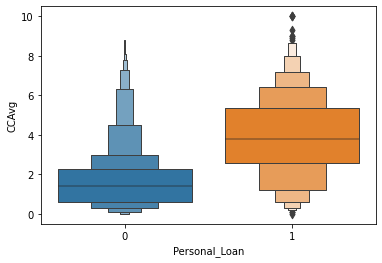

In [13]:
sns.boxenplot(x='Personal_Loan', y='CCAvg', data=loan);

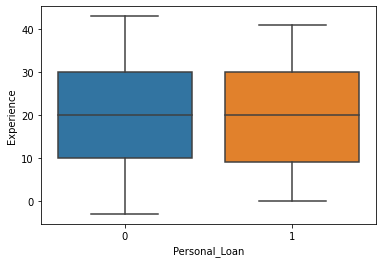

In [15]:
sns.boxplot(x='Personal_Loan', y='Experience', data=loan);

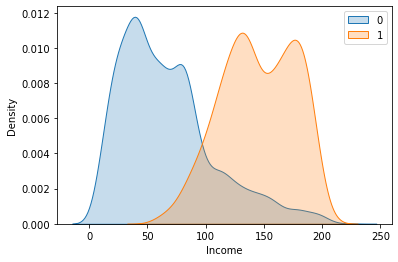

In [35]:
for name, rows in loan.groupby('Personal_Loan'):
    sns.kdeplot(rows['Income'], label=name, shade=True)
plt.legend();

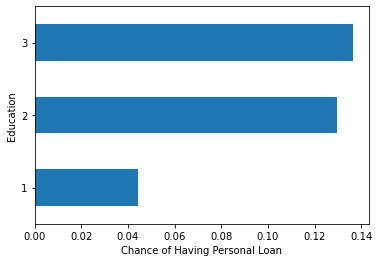

In [65]:
loan.groupby('Education')['Personal_Loan'].mean().plot(kind='barh')
plt.xlabel('Chance of Having Personal Loan');

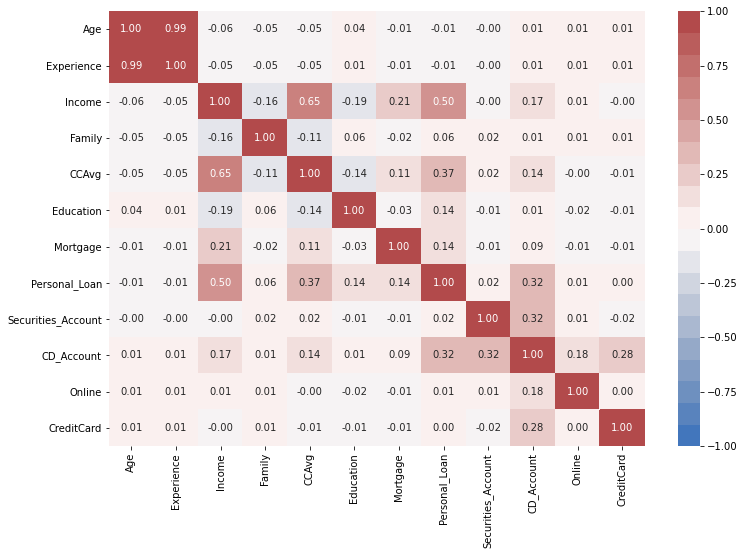

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(), vmin=-1, vmax=1, fmt='.2f', annot=True, cmap=sns.color_palette('vlag', 20));

## Modeling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as smf

In [38]:
X = loan.drop(columns='Personal_Loan')
y = loan['Personal_Loan']

In [39]:
y.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [45]:
y_test.value_counts(normalize=True)

0    0.904242
1    0.095758
Name: Personal_Loan, dtype: float64

In [54]:
mod = LogisticRegression(tol=.1, max_iter=300, solver='newton-cg' )
mod.fit(X_train, y_train)
mod.score(X_test, y_test)
y_pred = mod.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1492
           1       0.82      0.65      0.73       158

    accuracy                           0.95      1650
   macro avg       0.89      0.82      0.85      1650
weighted avg       0.95      0.95      0.95      1650



In [69]:
' + '.join(loan.columns)

'Age + Experience + Income + Family + CCAvg + Education + Mortgage + Personal_Loan + Securities_Account + CD_Account + Online + CreditCard'

In [71]:
mod = smf.logit(formula='Personal_Loan ~ Age + Experience + Income + Family + CCAvg + Education + Mortgage + Securities_Account + CD_Account + Online + CreditCard', data=loan)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.5938
Time:                        15:59:38   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -12.1927      1.645     -7.411      0.000     -15.417      -8.968
Age  

In [56]:
mod = RandomForestClassifier(n_estimators=100)
mod.fit(X_train, y_train)
mod.score(X_test, y_test)
y_pred = mod.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1492
           1       0.97      0.91      0.94       158

    accuracy                           0.99      1650
   macro avg       0.98      0.95      0.97      1650
weighted avg       0.99      0.99      0.99      1650



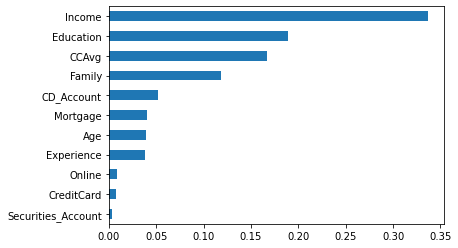

In [60]:
pd.Series(mod.feature_importances_, index=X.columns).sort_values().plot(kind='barh');

Which variables are most significant?

Income is the most signifcant factor to determine if a person has a personal loan or not. As income increase the chance of having personal loan increases.

Education is also an important factor. People with higher education tend to have a personal loan. 

The third important factor is average spending on credit cards per month.

Which segment of customers should be targeted more?
Based on the results in EDA and modeling section, customer with higher income and higher eduction have higher chance of having personal income. Also customer with higher credit card balance have higher chance of personal income. Therefore, these group of customer should be targeted more. 